In [85]:
import torch
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
device=torch.device('cuda:0')
torch.cuda.set_device(device)
import matplotlib.pyplot as plt
import numpy as np

In [136]:
# reload ScalingDimensions
import importlib
import ScalingDimensions
importlib.reload(ScalingDimensions)

from ScalingDimensions import show_diff,show_scaling_dimensions,get_scaling_dimensions

  0%|          | 0/61 [00:00<?, ?it/s]

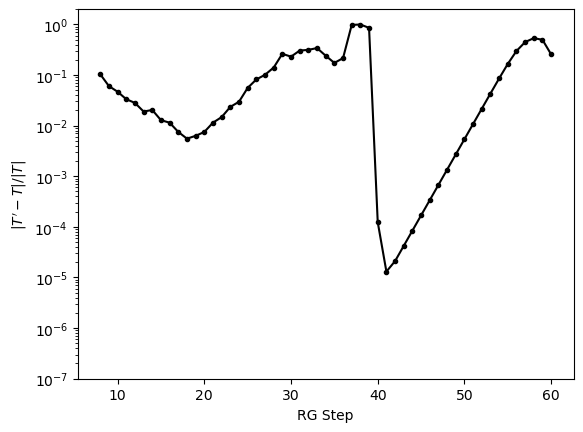

  0%|          | 0/61 [00:00<?, ?it/s]

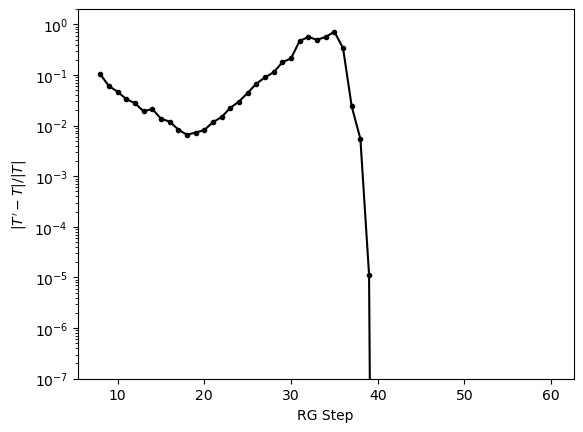

  0%|          | 0/61 [00:00<?, ?it/s]

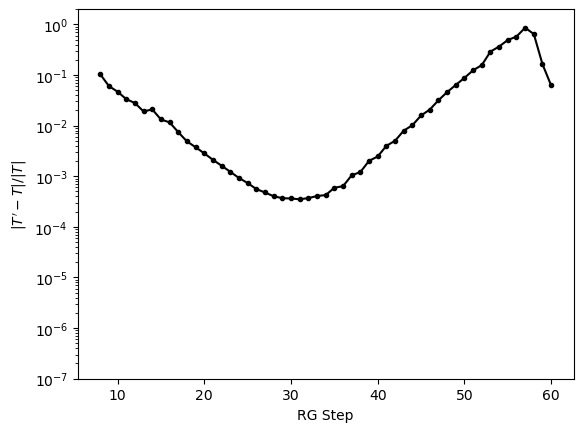

  0%|          | 0/61 [00:00<?, ?it/s]

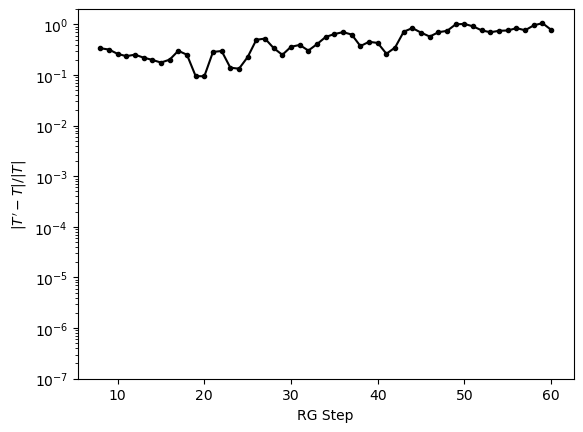

In [87]:
optionsH,paramsH,layersH,TsH,logTotalsH=torch.load('data/hotrg_gilt_X24_highB.pth',map_location=device)
curveH=show_diff(TsH,stride=2)

optionsL,paramsL,layersL,TsL,logTotalsL=torch.load('data/hotrg_gilt_X24_lowB.pth',map_location=device)
curveL=show_diff(TsL,stride=2)

optionsM,paramsM,layersM,TsM,logTotalsM=torch.load('data/hotrg_gilt_X24.pth',map_location=device)
curveM=show_diff(TsM,stride=2)

optionsNG,paramsNG,layersNG,TsNG,logTotalsNG=torch.load('data/hotrg_X24.pth',map_location=device)
curveNG=show_diff(TsNG,stride=2)

In [88]:
betaH=paramsH['beta']
betaL=paramsL['beta']
betaM=paramsM['beta']
TH=1/betaH
TL=1/betaL
TM=1/betaM
TM-TL

-5.053141749122858e-05

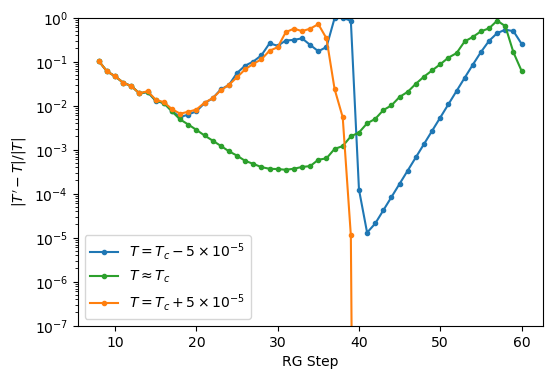

In [89]:
plt.figure(figsize=(6,4))
plt.plot(curveH['layer'],curveH['diff'],'.-',color='tab:blue',label=r'$T=T_c-5\times10^{-5}$')
plt.plot(curveM['layer'],curveM['diff'],'.-',color='tab:green',label=r'$T\approx T_c$')
plt.plot(curveL['layer'],curveL['diff'],'.-',color='tab:orange',label=r'$T=T_c+5\times10^{-5}$')
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.show()

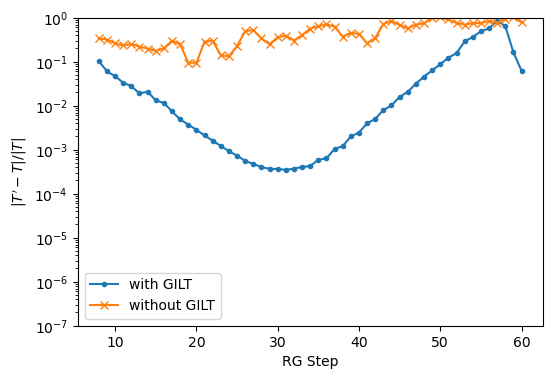

In [90]:
plt.figure(figsize=(6,4))
plt.plot(curveM['layer'],curveM['diff'],'.-',color='C0',label='with GILT')
plt.plot(curveNG['layer'],curveNG['diff'],'x-',color='C1',label='without GILT')
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.show()


  0%|          | 0/61 [00:00<?, ?it/s]

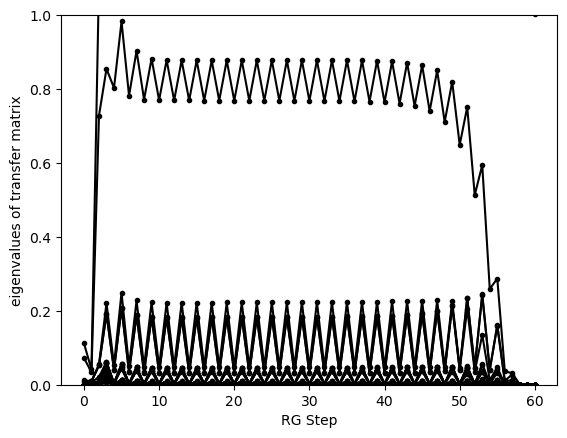

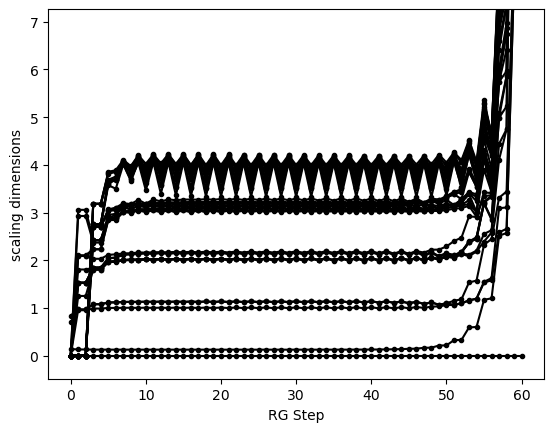

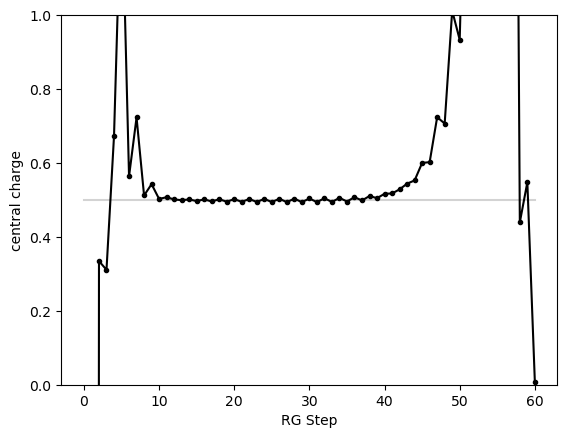

  0%|          | 0/61 [00:00<?, ?it/s]

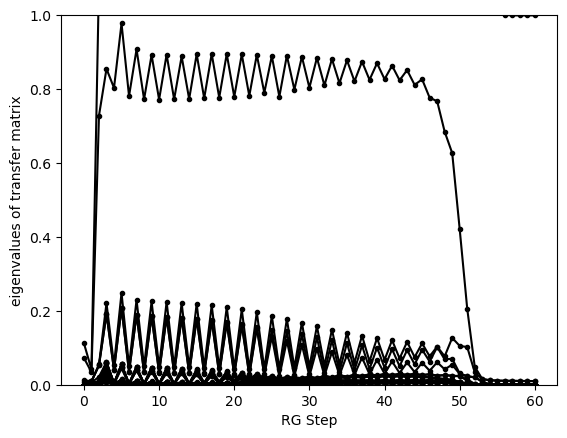

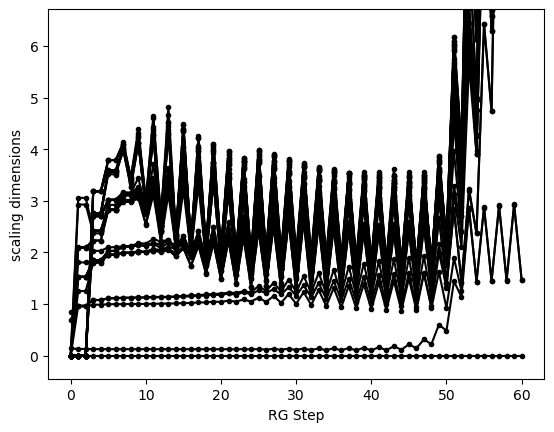

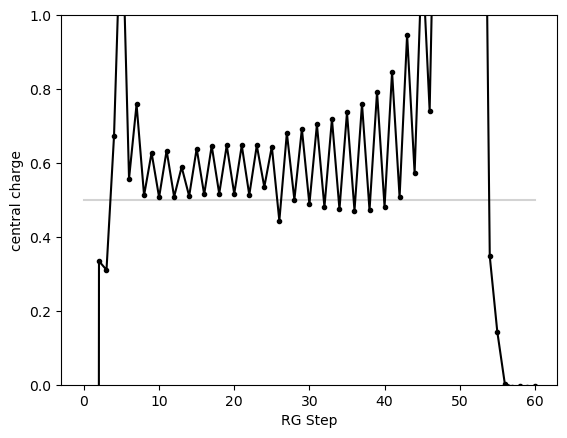

In [137]:
curve1M=show_scaling_dimensions(TsM,num_scaling_dims=32,display=True,stride=1,is_HOTRG=True,reference_center_charge=.5)
curve1NG=show_scaling_dimensions(TsNG,num_scaling_dims=32,display=True,stride=1,is_HOTRG=True,reference_center_charge=.5)

In [121]:
reference_scaling_dimensions=[
    0,.125,1,1.125,
    2,2.125,3,3.125,
    4]
reference_center_charge=.5
ref_scd=np.array([0,.125,1]+[1.125]*2+[2]*4+[2.125]*3+[3]*5+[3.125]*6+[4]*9)

In [122]:
#curve_scd_M=show_scaling_dimensions(TsM,num_scaling_dims=32,is_HOTRG=True,reference_scaling_dimensions=reference_scaling_dimensions,reference_center_charge=reference_center_charge)
scd_cyl_iLayer=np.array(curve1M['layer'].tolist())

scd_cyl=np.array(curve1M['scaling_dimensions'].tolist())
scd_cyl_err=np.abs(scd_cyl-ref_scd)

scd_cyl_NG=np.array(curve1NG['scaling_dimensions'].tolist())
scd_cyl_err_NG=np.abs(scd_cyl_NG-ref_scd)

In [123]:
scd_ltrg_iLayers=[*range(2,60,2)]
scd_ltrg=[]
for iLayer in scd_ltrg_iLayers:
    filename='data/layers/hotrg_gilt_X24_lTRG_gilt_L%d.pth'%iLayer
    options,sr,ur=torch.load(filename,map_location=device)
    print(filename)
    scd_ltrg.append(get_scaling_dimensions(sr,scaling=2).tolist())
    del options,sr,ur
scd_ltrg=np.array(scd_ltrg)

scd_ltrg_err=np.abs(scd_ltrg-ref_scd)


data/layers/hotrg_gilt_X24_lTRG_gilt_L2.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L4.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L6.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L8.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L10.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L12.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L14.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L16.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L18.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L20.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L22.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L24.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L26.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L28.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L30.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L32.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L34.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L36.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L38.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L40.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L42.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L44.pth
data/layers/ho

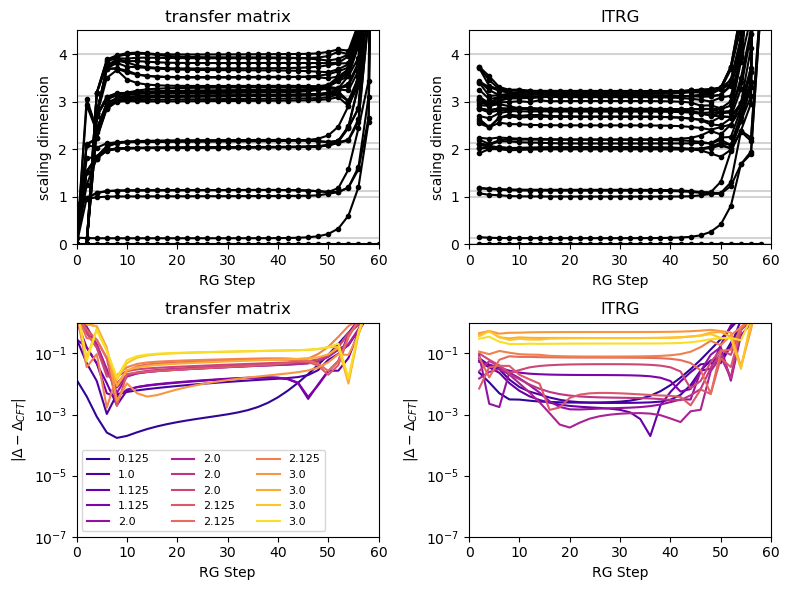

In [124]:


plt.figure(figsize=(8,6))
plt.subplot(221)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')


#plot only the even iLayers
mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('transfer matrix')

plt.subplot(222)
for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

for i in range(scd_ltrg.shape[1]):
    plt.plot(scd_ltrg_iLayers,scd_ltrg[:,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('lTRG')


nk=16


plt.subplot(223)
cmap=plt.get_cmap('plasma')
mask=scd_cyl_iLayer%2==0
for i in range(1,nk):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl_err[mask,i],'-',color=cmap(i/nk),label=ref_scd[i])
#plt.legend(ncol=2)
plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.legend(ncol=3,prop={'size': 8})
plt.title('transfer matrix')

plt.subplot(224)
for i in range(1,nk):
    plt.plot(scd_ltrg_iLayers,scd_ltrg_err[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
    # best_step=np.argmin(scd_ltrg_err[:,i])
    # plt.plot(scd_ltrg_iLayers[best_step],scd_ltrg_err[best_step,i],'o',color=cmap(i/nk))
plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.title('lTRG')


# plt.rcParams['axes.titley'] = 1.0
# plt.rcParams['axes.titlepad'] = -14


plt.tight_layout()
plt.show()
    
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


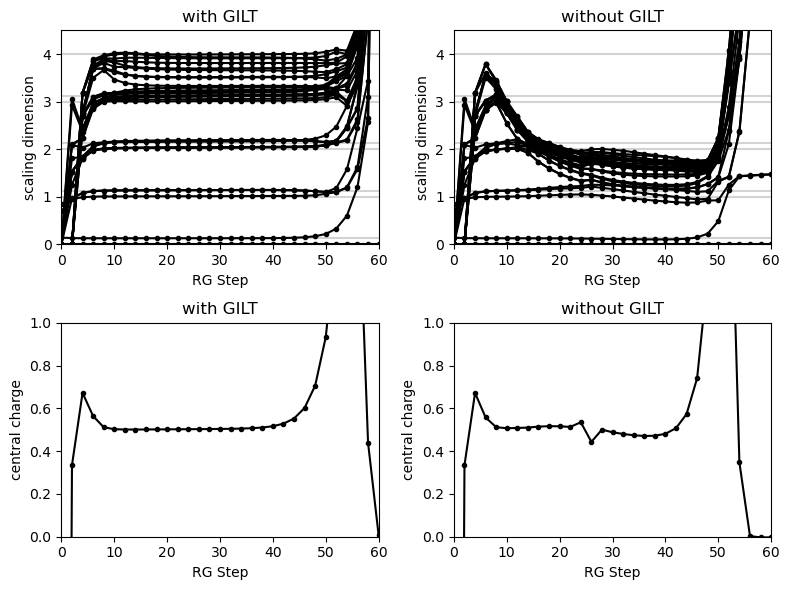

In [125]:


plt.figure(figsize=(8,6))
plt.subplot(221)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('with GILT')

plt.subplot(222)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl_NG.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl_NG[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('without GILT')

nk=16



plt.subplot(223)
plt.plot(scd_cyl_iLayer[mask],curve1M['center_charge'][mask],'.-',color='black')
plt.xlim(0,60)
plt.ylim(0,1)
plt.xlabel('RG Step')
plt.ylabel('central charge')
plt.title('with GILT')


plt.subplot(224)
plt.plot(scd_cyl_iLayer[mask],curve1NG['center_charge'][mask],'.-',color='black')
plt.xlim(0,60)
plt.ylim(0,1)
plt.xlabel('RG Step')
plt.ylabel('central charge')
plt.title('without GILT')





# plt.rcParams['axes.titley'] = 1.0
# plt.rcParams['axes.titlepad'] = -14


plt.tight_layout()
plt.show()
    
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


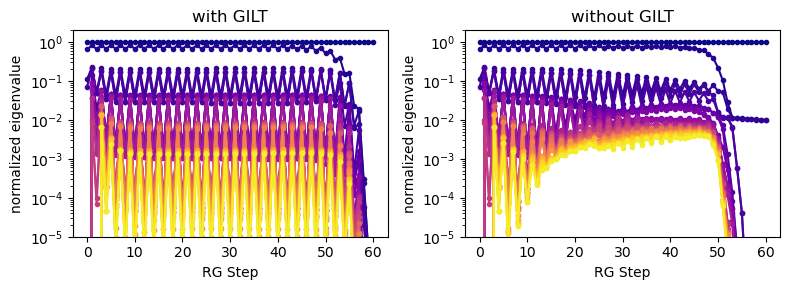

In [172]:
eigs1M=np.array(curve1M['eigs'].tolist())
eigs1NG=np.array(curve1NG['eigs'].tolist())

plt.figure(figsize=(8,3))

plt.subplot(121)
cmap=plt.get_cmap('plasma')
for i in range(eigs1M.shape[1]):
    plt.plot(eigs1M[:,i]/eigs1M[:,0],'.-',color=cmap(i/eigs1M.shape[1]))
plt.yscale('log')
plt.ylim(1e-5,2)
plt.title('with GILT')
plt.xlabel('RG Step')
plt.ylabel('normalized eigenvalue')

plt.subplot(122)
for i in range(eigs1NG.shape[1]):
    plt.plot(eigs1NG[:,i]/eigs1NG[:,0],'.-',color=cmap(i/eigs1NG.shape[1]))
plt.yscale('log')
plt.ylim(1e-5,2)
plt.title('without GILT')
plt.xlabel('RG Step')
plt.ylabel('normalized eigenvalue')

plt.tight_layout()
plt.show()


Text(0.5, 0, 'RG Step')

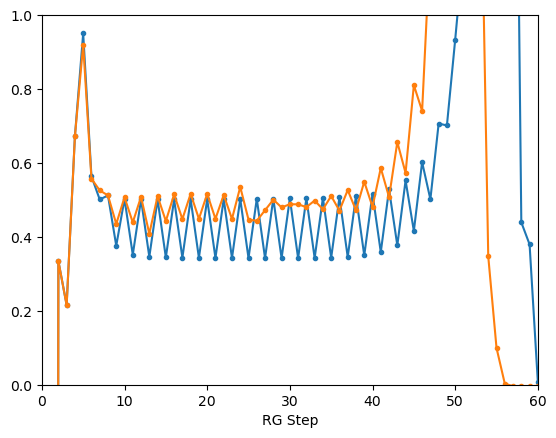

In [133]:
mask=scd_cyl_iLayer%2==0
mask1=scd_cyl_iLayer%2==1

sNG=np.array(curve1NG['center_charge'].copy().to_list())
sNG[mask1]=sNG[mask1]*np.log(2)

sG=np.array(curve1M['center_charge'].copy().to_list())
sG[mask1]=sG[mask1]*np.log(2)

plt.plot(scd_cyl_iLayer,sG,'.-',label='with GILT',color='C0')
plt.plot(scd_cyl_iLayer,sNG,'.-',label='without GILT',color='C1')
plt.ylim(0,1)
plt.xlim(0,60)
plt.xlabel('RG Step')

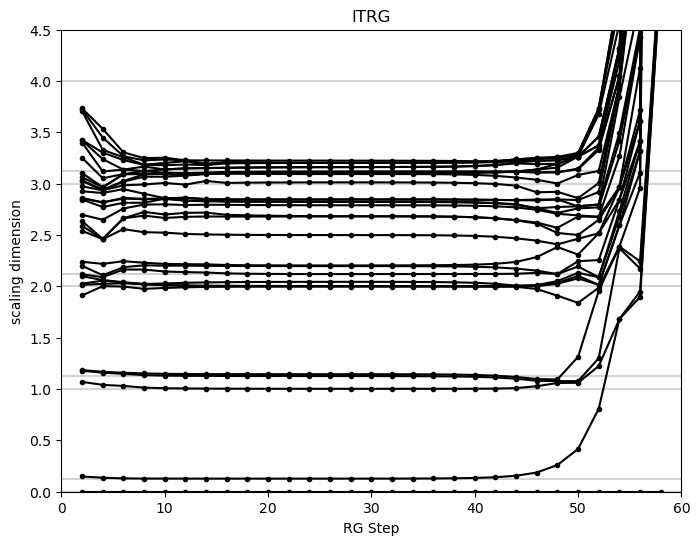

In [20]:
plt.figure(figsize=(8,6))
for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

for i in range(scd_ltrg.shape[1]):
    plt.plot(iLayers,scd_ltrg[:,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('lTRG')
plt.show()

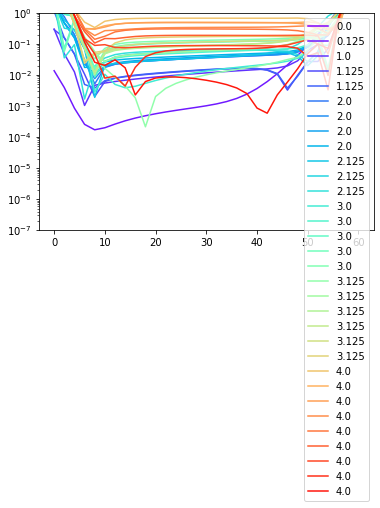

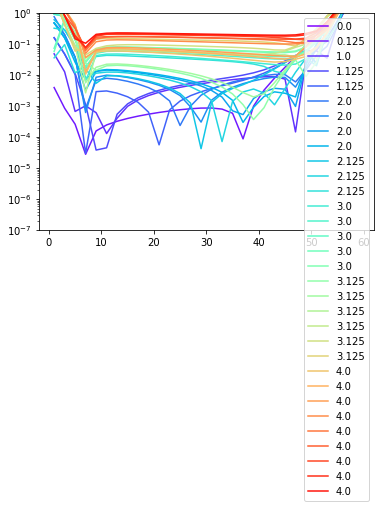

In [38]:
nk=32

curve1=curve_scd_M[curve_scd_M['layer']%2==0]
scd=np.array(curve1['scaling_dimensions'].tolist())
scderr=np.abs(scd[:,:nk]-ref_scd)
cmap=plt.get_cmap('rainbow')
for i in range(scderr.shape[1]):
    plt.plot(curve1['layer'],scderr[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
plt.legend()
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()

curve1=curve_scd_M[curve_scd_M['layer']%2==1]
scd=np.array(curve1['scaling_dimensions'].tolist())
scderr=np.abs(scd[:,:nk]-ref_scd)
cmap=plt.get_cmap('rainbow')
for i in range(scderr.shape[1]):
    plt.plot(curve1['layer'],scderr[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
plt.legend()
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()


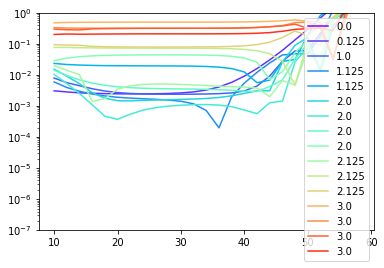

In [41]:
nk=16

scd_ltrg_err=np.abs(scd_ltrg[:,:nk]-ref_scd[:nk])

for i in range(scd_ltrg_err.shape[1]):
    #plt.plot(curve1['layer'],scderr[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
    plt.plot(iLayers,scd_ltrg_err[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
plt.legend()
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()
    